In [98]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from statsmodels.tsa.arima.model import ARIMA
from sklearn.cluster import KMeans

In [28]:
df = pd.read_excel('/content/Coffee Shop Sales.xlsx')
df.head()

,transaction_id,transaction_date,transaction_time,transaction_qty,store_id,store_location,product_id,unit_price,product_category,product_type,product_detail
0,1,2023-01-01,07:06:11,2,5,Lower Manhattan,32,3.0,Coffee,Gourmet brewed coffee,Ethiopia Rg
1,2,2023-01-01,07:08:56,2,5,Lower Manhattan,57,3.1,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg
2,3,2023-01-01,07:14:04,2,5,Lower Manhattan,59,4.5,Drinking Chocolate,Hot chocolate,Dark chocolate Lg
3,4,2023-01-01,07:20:24,1,5,Lower Manhattan,22,2.0,Coffee,Drip coffee,Our Old Time Diner Blend Sm
4,5,2023-01-01,07:22:41,2,5,Lower Manhattan,57,3.1,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg


In [29]:
df.shape

(149116, 11)

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149116 entries, 0 to 149115
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   transaction_id    149116 non-null  int64         
 1   transaction_date  149116 non-null  datetime64[ns]
 2   transaction_time  149116 non-null  object        
 3   transaction_qty   149116 non-null  int64         
 4   store_id          149116 non-null  int64         
 5   store_location    149116 non-null  object        
 6   product_id        149116 non-null  int64         
 7   unit_price        149116 non-null  float64       
 8   product_category  149116 non-null  object        
 9   product_type      149116 non-null  object        
 10  product_detail    149116 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(4), object(5)
memory usage: 12.5+ MB


In [31]:
df.describe(include='all').T

,count,unique,top,freq,mean,min,25%,50%,75%,max,std
transaction_id,149116.0,NaN,NaN,NaN,74737.371872,1.0,37335.75,74727.5,112094.25,149456.0,43153.600016
transaction_date,149116,NaN,NaN,NaN,2023-04-15 11:50:32.173609984,2023-01-01 00:00:00,2023-03-06 00:00:00,2023-04-24 00:00:00,2023-05-30 00:00:00,2023-06-30 00:00:00,NaN
transaction_time,149116,25762,09:31:15,41,NaN,NaN,NaN,NaN,NaN,NaN,NaN
transaction_qty,149116.0,NaN,NaN,NaN,1.438276,1.0,1.0,1.0,2.0,8.0,0.542509
store_id,149116.0,NaN,NaN,NaN,5.342063,3.0,3.0,5.0,8.0,8.0,2.074241
store_location,149116,3,Hell's Kitchen,50735,NaN,NaN,NaN,NaN,NaN,NaN,NaN
product_id,149116.0,NaN,NaN,NaN,47.918607,1.0,33.0,47.0,60.0,87.0,17.93002
unit_price,149116.0,NaN,NaN,NaN,3.382219,0.8,2.5,3.0,3.75,45.0,2.658723
product_category,149116,9,Coffee,58416,NaN,NaN,NaN,NaN,NaN,NaN,NaN
product_type,149116,29,Brewed Chai tea,17183,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [32]:
missing_values = df.isnull().sum()
missing_values

,0
transaction_id,0
transaction_date,0
transaction_time,0
transaction_qty,0
store_id,0
store_location,0
product_id,0
unit_price,0
product_category,0
product_type,0


In [33]:
df.duplicated().sum()

0

In [34]:
outliers_unit_price = df[(df['unit_price'] > df['unit_price'].quantile(.99)) | (df['unit_price'] < df['unit_price'].quantile(.01))]
outliers_transqty = df[(df['transaction_qty'] > df['transaction_qty'].quantile(.99)) | (df['transaction_qty'] < df['transaction_qty'].quantile(.01))]
outliers_unit_price.shape , outliers_transqty.shape

((1140, 11), (36, 11))

In [35]:
df.nunique()

,0
transaction_id,149116
transaction_date,181
transaction_time,25762
transaction_qty,6
store_id,3
store_location,3
product_id,80
unit_price,41
product_category,9
product_type,29


In [36]:
df.describe(include='object').T

,count,unique,top,freq
transaction_time,149116,25762,09:31:15,41
store_location,149116,3,Hell's Kitchen,50735
product_category,149116,9,Coffee,58416
product_type,149116,29,Brewed Chai tea,17183
product_detail,149116,80,Chocolate Croissant,3076


In [37]:
df['transaction_date'] = pd.to_datetime(df['transaction_date'])

In [38]:
df['total_sales'] = df['transaction_qty'] * df['unit_price']

In [39]:
product_summary = df.groupby('product_detail').agg({'transaction_qty': 'sum', 'unit_price': 'mean', 'total_sales': 'sum'}).reset_index()
product_summary

,product_detail,transaction_qty,unit_price,total_sales
0,Almond Croissant,1911,3.750988,7168.13
1,Brazilian - Organic,214,18.000000,3852.00
2,Brazilian Lg,4317,3.500000,15109.50
3,Brazilian Rg,4385,3.000000,13155.00
4,Brazilian Sm,4310,2.200000,9482.00
...,...,...,...,...
75,Sustainably Grown Organic Lg,4453,4.750000,21151.75
76,Sustainably Grown Organic Rg,4329,3.750000,16233.75
77,Traditional Blend Chai,153,8.950000,1369.35
78,Traditional Blend Chai Lg,4174,3.000000,12522.00


In [40]:
#Cost Price is not given so assuming it
cost_ratio = 0.7  # Assuming cost is 70% of the selling price
product_summary['cost'] = product_summary['total_sales'] * cost_ratio
product_summary['profit'] = product_summary['total_sales'] - product_summary['cost']
product_summary

,product_detail,transaction_qty,unit_price,total_sales,cost,profit
0,Almond Croissant,1911,3.750988,7168.13,5017.691,2150.439
1,Brazilian - Organic,214,18.000000,3852.00,2696.400,1155.600
2,Brazilian Lg,4317,3.500000,15109.50,10576.650,4532.850
3,Brazilian Rg,4385,3.000000,13155.00,9208.500,3946.500
4,Brazilian Sm,4310,2.200000,9482.00,6637.400,2844.600
...,...,...,...,...,...,...
75,Sustainably Grown Organic Lg,4453,4.750000,21151.75,14806.225,6345.525
76,Sustainably Grown Organic Rg,4329,3.750000,16233.75,11363.625,4870.125
77,Traditional Blend Chai,153,8.950000,1369.35,958.545,410.805
78,Traditional Blend Chai Lg,4174,3.000000,12522.00,8765.400,3756.600


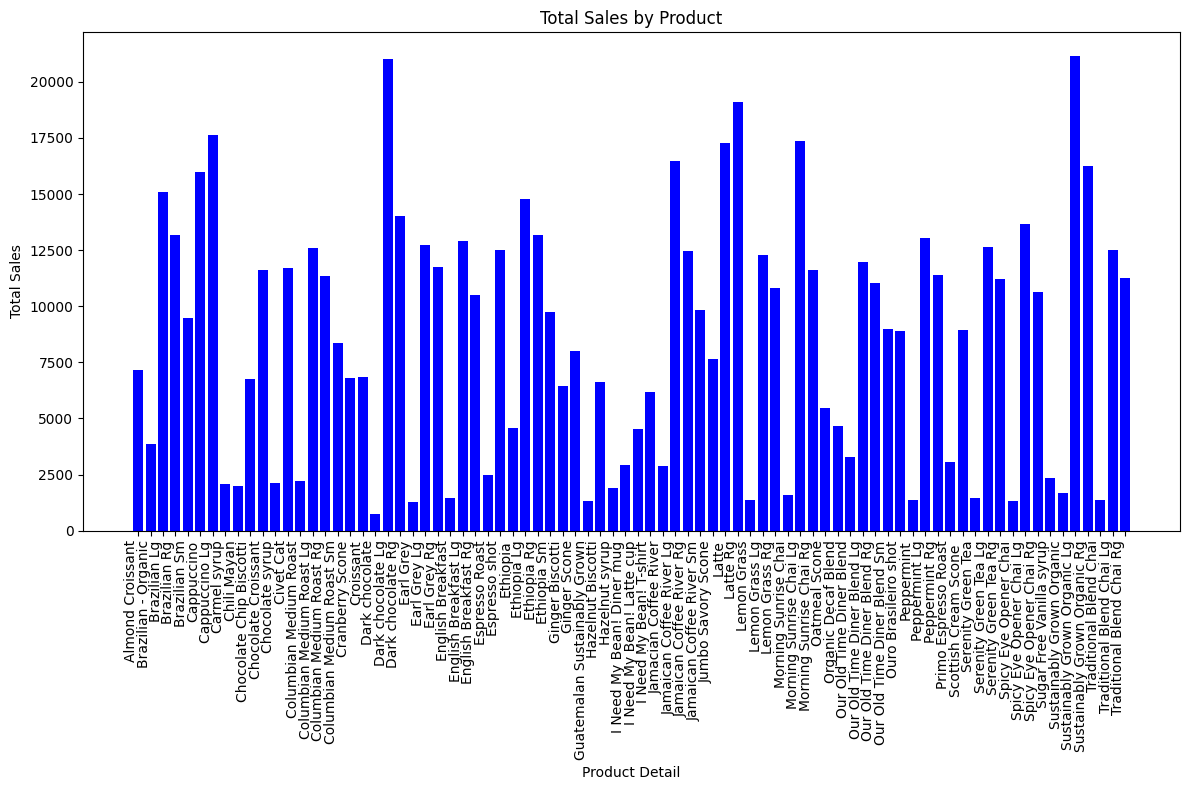

In [41]:
# Plot total sales for each product
plt.figure(figsize=(12, 8))
plt.bar(product_summary['product_detail'], product_summary['total_sales'], color='blue')
plt.xlabel('Product Detail')
plt.ylabel('Total Sales')
plt.title('Total Sales by Product')
plt.xticks(rotation=90, ha='right')

plt.tight_layout()
plt.show()

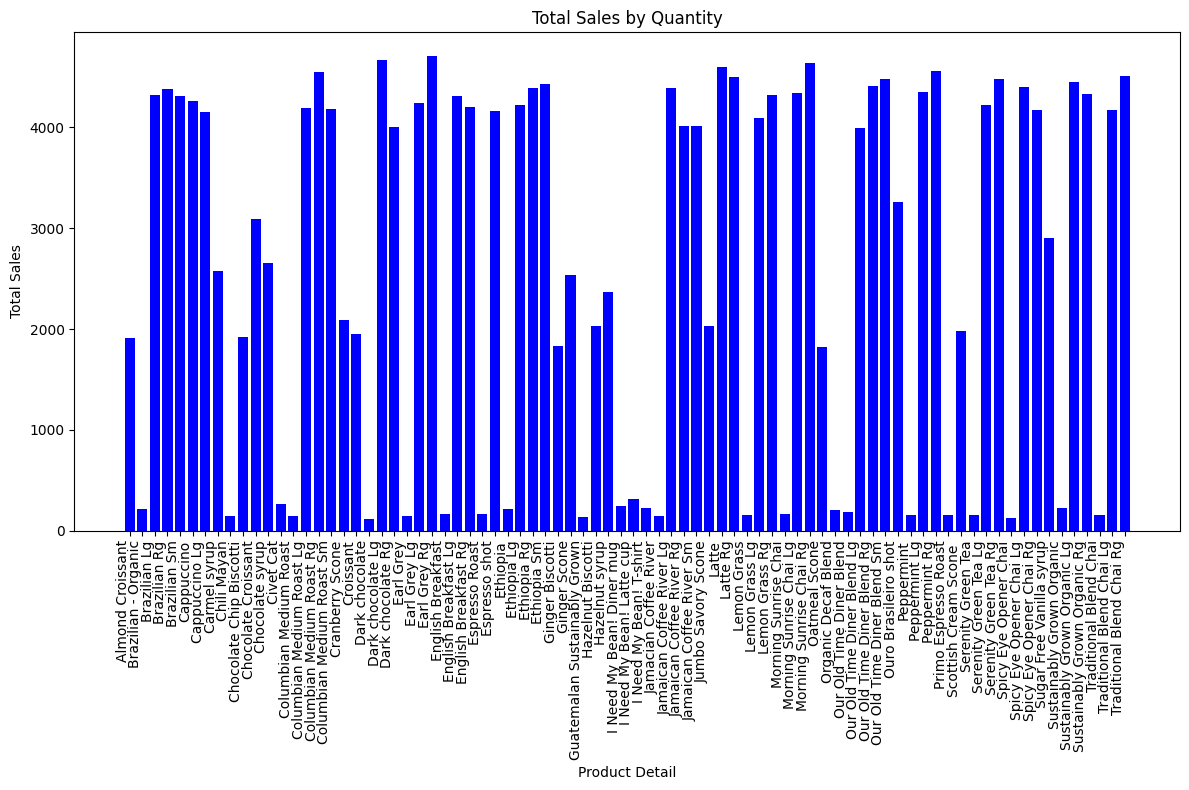

In [78]:
# Plot total sales for each product
plt.figure(figsize=(12, 8))
plt.bar(product_summary['product_detail'], product_summary['transaction_qty'], color='blue')
plt.xlabel('Product Detail')
plt.ylabel('Total Sales')
plt.title('Total Sales by Quantity')
plt.xticks(rotation=90, ha='right')

plt.tight_layout()
plt.show()

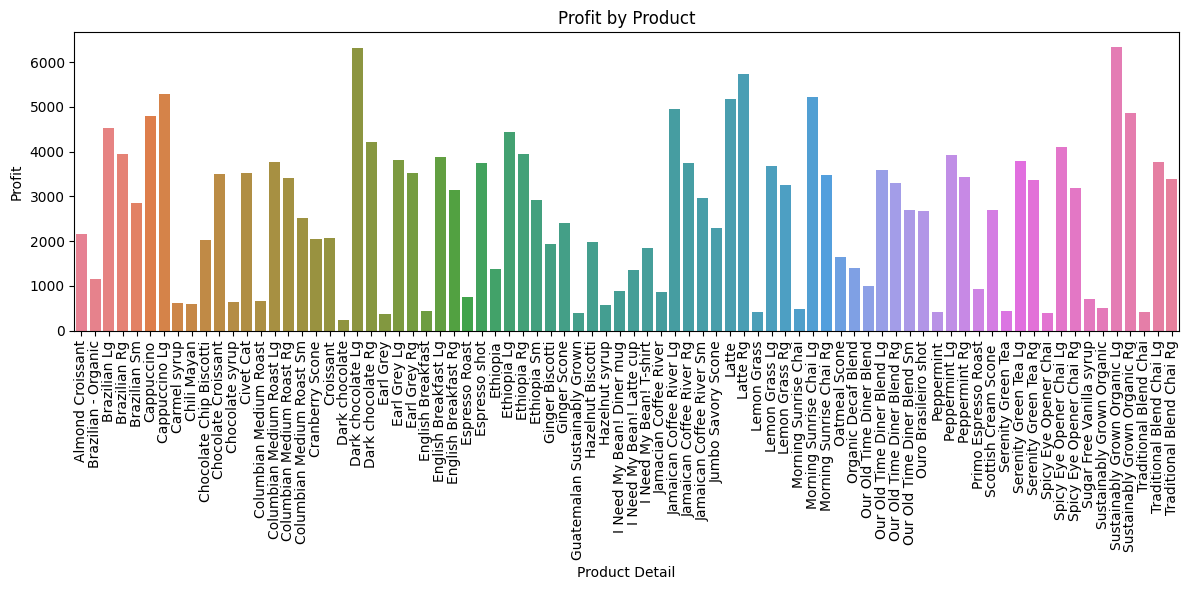

In [43]:
plt.figure(figsize=(12, 6))
sns.barplot(x='product_detail', y='profit', data=product_summary, hue='product_detail')
plt.xticks(rotation=90)
plt.title('Profit by Product')
plt.xlabel('Product Detail')
plt.ylabel('Profit')
plt.legend([], frameon=False)
plt.tight_layout()
plt.show()

In [44]:
product_sales = df.groupby('product_detail')['total_sales'].sum().sort_values(ascending=False).reset_index()
product_sales

,product_detail,total_sales
0,Sustainably Grown Organic Lg,21151.75
1,Dark chocolate Lg,21006.00
2,Latte Rg,19112.25
3,Cappuccino Lg,17641.75
4,Morning Sunrise Chai Lg,17384.00
...,...,...
75,Lemon Grass,1360.40
76,Guatemalan Sustainably Grown,1340.00
77,Spicy Eye Opener Chai,1335.90
78,Earl Grey,1270.90


In [61]:
profit_summary = product_summary.sort_values(by='profit', ascending=False)
profit_summary

,product_detail,transaction_qty,unit_price,total_sales,cost,profit
75,Sustainably Grown Organic Lg,4453,4.75,21151.75,14806.225,6345.525
20,Dark chocolate Lg,4668,4.50,21006.00,14704.200,6301.800
48,Latte Rg,4497,4.25,19112.25,13378.575,5733.675
6,Cappuccino Lg,4151,4.25,17641.75,12349.225,5292.525
53,Morning Sunrise Chai Lg,4346,4.00,17384.00,12168.800,5215.200
...,...,...,...,...,...,...
49,Lemon Grass,152,8.95,1360.40,952.280,408.120
36,Guatemalan Sustainably Grown,134,10.00,1340.00,938.000,402.000
70,Spicy Eye Opener Chai,122,10.95,1335.90,935.130,400.770
22,Earl Grey,142,8.95,1270.90,889.630,381.270


<ipython-input-67-453a9efcf041>:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90)


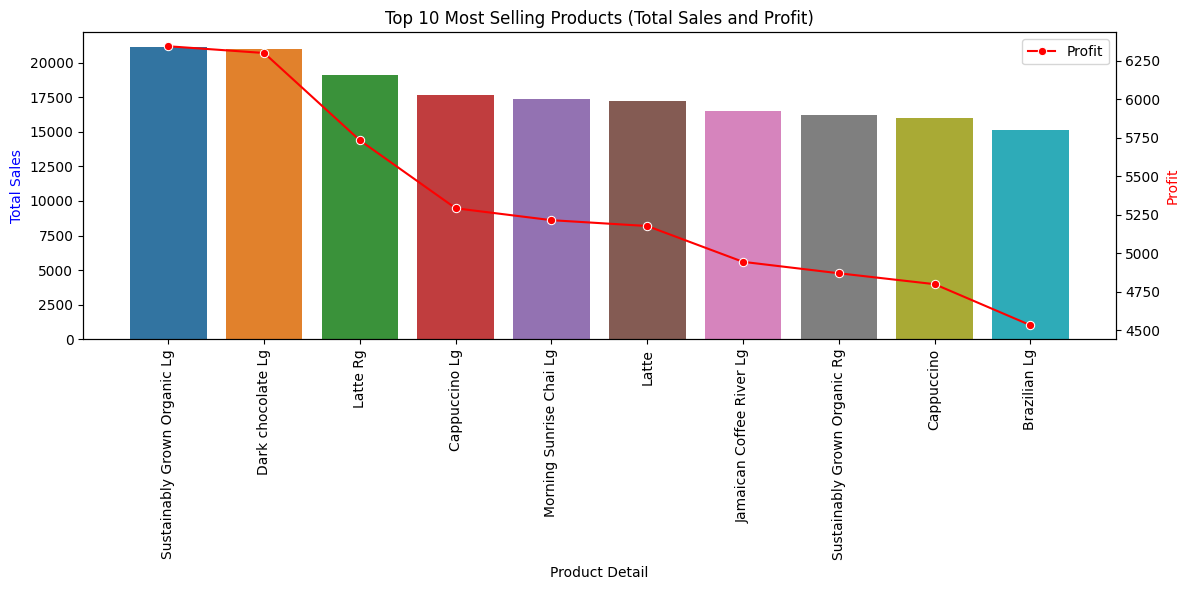

In [67]:
#Top 10 selling product
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot Total Sales on the left axis
sns.barplot(x='product_detail', y='total_sales', data=product_sales.head(10), ax=ax1, hue='product_detail')
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90)
ax1.set_title('Top 10 Most Selling Products (Total Sales and Profit)')
ax1.set_xlabel('Product Detail')
ax1.set_ylabel('Total Sales', color='blue')

# Create a second y-axis for Profit
ax2 = ax1.twinx()
sns.lineplot(x='product_detail', y='profit', data=profit_summary.head(10), ax=ax2, color='red', marker='o', label='Profit')
ax2.set_ylabel('Profit', color='red')
fig.tight_layout()
plt.show()

<ipython-input-66-d3bb26451847>:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90)


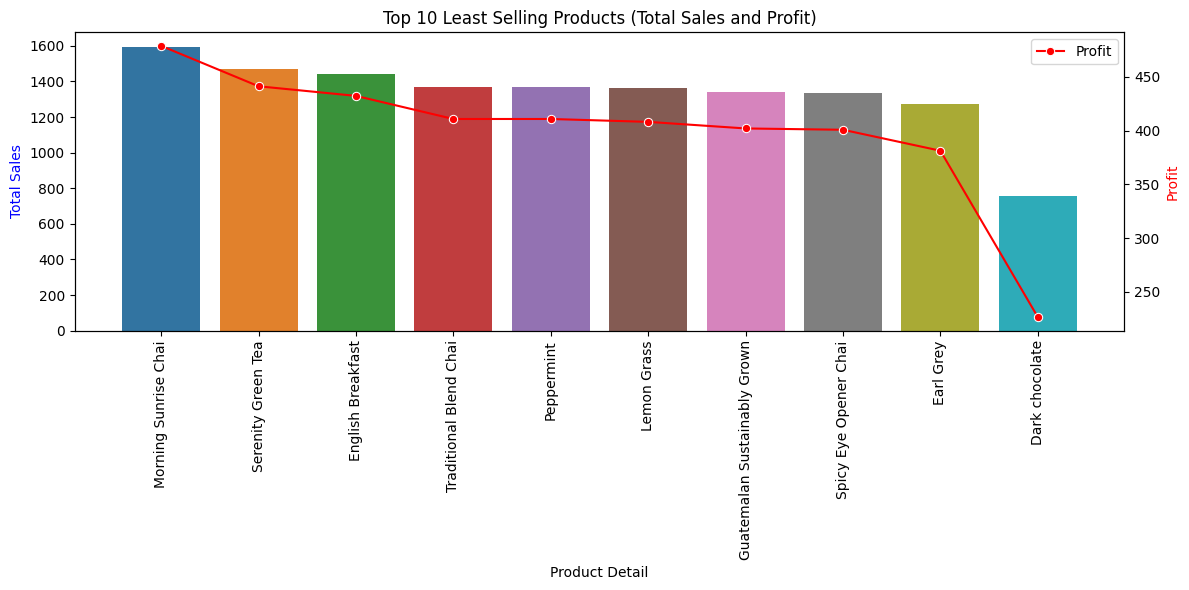

In [66]:
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot Total Sales on the left axis
sns.barplot(x='product_detail', y='total_sales', data=product_sales.tail(10), ax=ax1, hue='product_detail')
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90)
ax1.set_title('Top 10 Least Selling Products (Total Sales and Profit)')
ax1.set_xlabel('Product Detail')
ax1.set_ylabel('Total Sales', color='blue')

# Create a second y-axis for Profit
ax2 = ax1.twinx()
sns.lineplot(x='product_detail', y='profit', data=profit_summary.tail(10), ax=ax2, color='red', marker='o', label='Profit')
ax2.set_ylabel('Profit', color='red')
fig.tight_layout()
plt.show()

In [71]:
X = df[['transaction_qty', 'unit_price']]
y = df['total_sales']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [72]:
print(f'Mean Squared Error: {mean_squared_error(y_test, y_pred)}')
print(f'R-squared: {r2_score(y_test, y_pred)}')

Mean Squared Error: 0.5843620845207137
R-squared: 0.9360842045103704


In [75]:
low_performance_threshold = df['total_sales'].quantile(0.1)
low_performance_product = df[df['total_sales'] < low_performance_threshold]
low_performance_product['product_detail'].value_counts().reset_index()

,product_detail,count
0,Sugar Free Vanilla syrup,1803
1,Chocolate syrup,1733
2,Carmel syrup,1722
3,Hazelnut syrup,1513
4,Our Old Time Diner Blend Sm,1422
5,Brazilian Sm,1404
6,Columbian Medium Roast Sm,1337
7,Ethiopia Sm,1332
8,Jamaican Coffee River Sm,1311
9,Ouro Brasileiro shot,547


In [86]:
df['transaction_date'] = pd.to_datetime(df['transaction_date'])
daily_sales = df.groupby(df['transaction_date'].dt.date)['total_sales'].sum()
daily_sales

,total_sales
transaction_date,
2023-01-01,2508.20
2023-01-02,2403.35
2023-01-03,2565.00
2023-01-04,2220.10
2023-01-05,2418.85
...,...
2023-06-26,5875.90
2023-06-27,5975.65
2023-06-28,4728.90


In [87]:
model = ARIMA(daily_sales, order=(1, 1, 1))
model_fit = model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In [92]:
forecasted_sales = model_fit.forecast(steps=20)

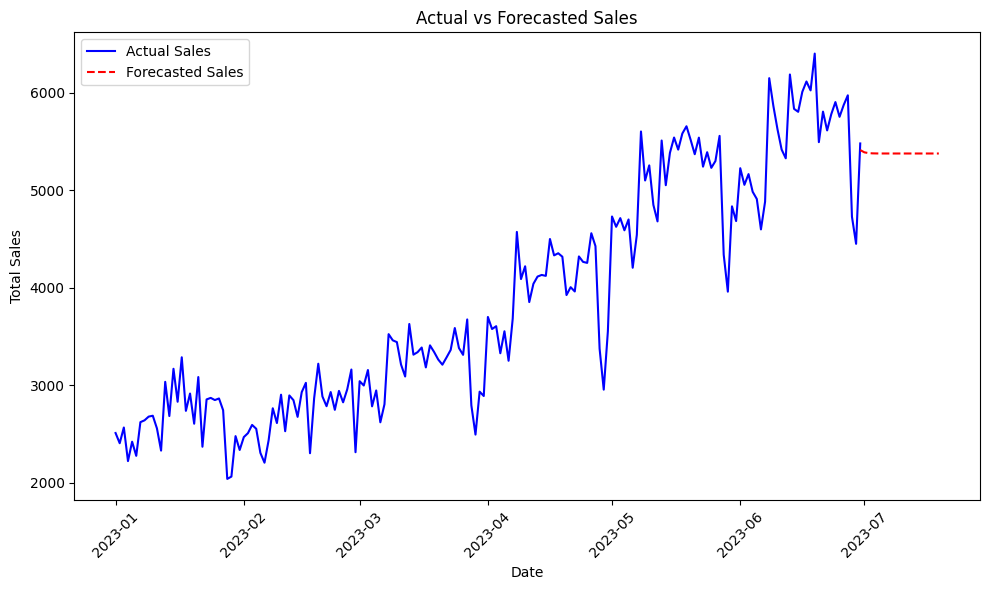

In [95]:
plt.figure(figsize=(10, 6))

plt.plot(daily_sales.index, daily_sales.values, label='Actual Sales', color='blue')

forecast_index = pd.date_range(daily_sales.index[-1], periods=20, freq='D')
plt.plot(forecast_index, forecasted_sales, label='Forecasted Sales', color='red', linestyle='--')

plt.title('Actual vs Forecasted Sales')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.legend()

plt.tight_layout()
plt.show()

In [99]:
features = df[['transaction_qty', 'unit_price']]
kmeans = KMeans(n_clusters=3, random_state=42)
df['cluster'] = kmeans.fit_predict(features)

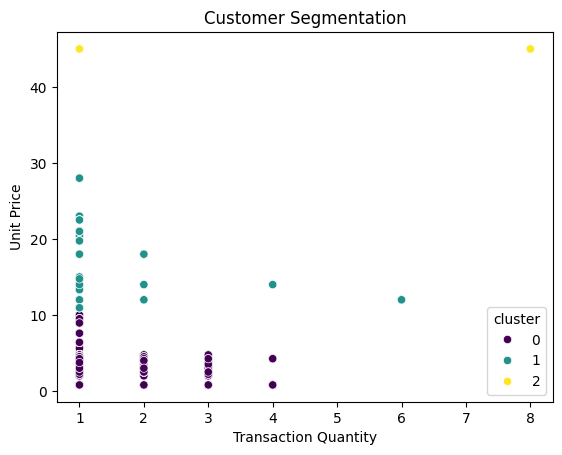

In [100]:
sns.scatterplot(x='transaction_qty', y='unit_price', hue='cluster', data=df, palette='viridis')
plt.title('Customer Segmentation')
plt.xlabel('Transaction Quantity')
plt.ylabel('Unit Price')
plt.show()

In [106]:
inventory_turnover = df.groupby('product_detail')['transaction_qty'].sum() / df['transaction_qty'].mean()
inventory_turnover.sort_values(ascending=True).head(10).reset_index()

,product_detail,transaction_qty
0,Dark chocolate,82.042654
1,Spicy Eye Opener Chai,84.823761
2,Guatemalan Sustainably Grown,93.167082
3,Earl Grey,98.729295
4,Jamacian Coffee River,101.510402
5,Chili Mayan,102.900956
6,Columbian Medium Roast,102.900956
7,Primo Espresso Roast,104.291509
8,Lemon Grass,105.682063
9,Traditional Blend Chai,106.377339


In [107]:
df['profit'] = df['total_sales'] *(1 - cost_ratio)

low_margin_products = df[df['profit'] < df['profit'].quantile(0.1)]
low_margin_products['product_detail'].value_counts().reset_index()

,product_detail,count
0,Sugar Free Vanilla syrup,1803
1,Chocolate syrup,1733
2,Carmel syrup,1722
3,Hazelnut syrup,1513
4,Our Old Time Diner Blend Sm,1422
5,Brazilian Sm,1404
6,Columbian Medium Roast Sm,1337
7,Ethiopia Sm,1332
8,Jamaican Coffee River Sm,1311
9,Ouro Brasileiro shot,547
